In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

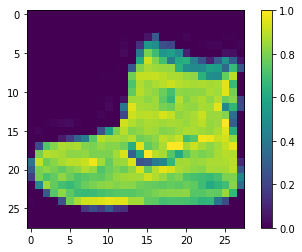

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

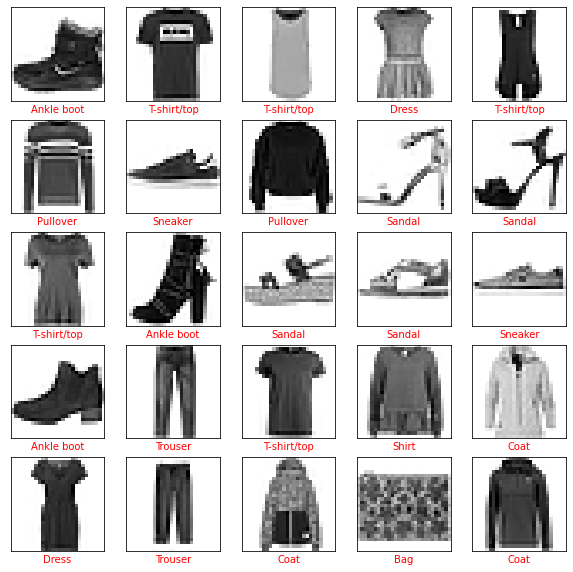

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    sub = plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sub.xaxis.label.set_color('red')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model

In [10]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4999 - accuracy: 0.8229

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8718
Test accuracy: 0.8718000054359436


In [13]:
predictions = model.predict(test_images)
np.argmax(predictions[0])
# sum(predictions[0])
# predictions[0][9]
predictions[0]
class_names[9]

'Ankle boot'

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'white'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#000000")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


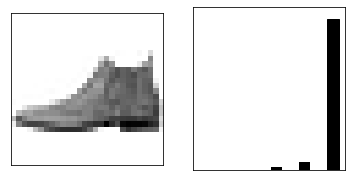

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

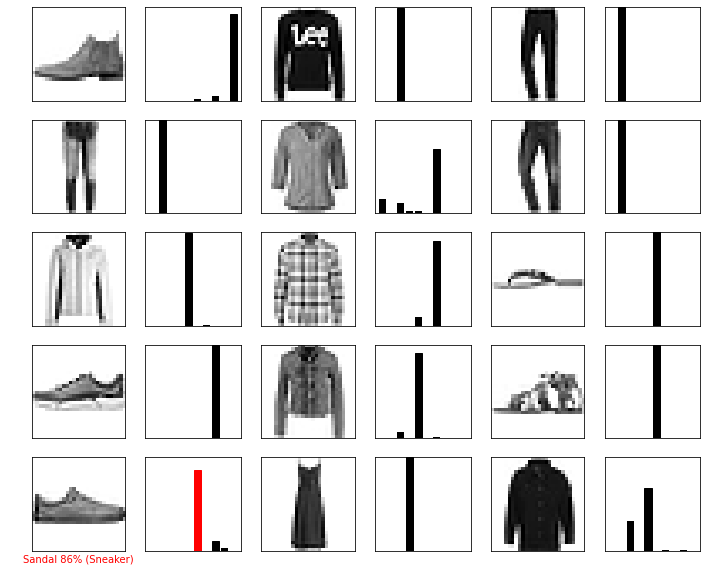

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [17]:
# Возьмём изображение из тестового набора данных
img = test_images[0]

In [18]:
#Добавим изображение в пакет, где он является единственным членом
img = (np.expand_dims (img, 0))

In [19]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.3018062e-04 2.4976863e-08 5.2265832e-06 5.3103150e-07 5.4409006e-06
  1.8820757e-02 3.5911605e-06 5.2338272e-02 6.9868445e-05 9.2862606e-01]]


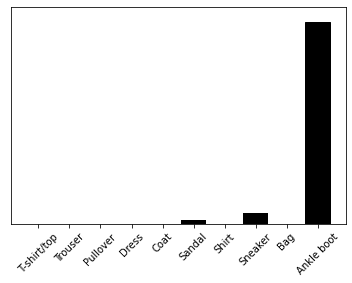

In [20]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [21]:
result_ind = np.argmax(predictions_single[0])
class_names[result_ind]

'Ankle boot'

In [22]:
model.save_weights('weight.h5')
print('model saved')

model saved


In [23]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
# loaded_model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#
# loaded_model
score = loaded_model.evaluate(test_images[0])
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

OSError: SavedModel file does not exist at: model.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.load_weights('weight.h5')

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
print(img.shape)
print(test_images[0].shape)
img = (np.expand_dims (test_images[0], 0))

model.predict(img)

